In [1]:
import numpy as np
import cv2
import numpy
import math
import os
import sklearn.linear_model
import sklearn.datasets
import matplotlib.pyplot as plt
plt.close('all')


In [56]:
def psnr(img1, img2):
    mse = numpy.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))



def flat_coordinates(x,y,h,w):
    return (x-1)*w + y

# Training 

In [8]:

folder = 'faces'

lst = os.listdir(folder)

imgs_hr = []
for i in lst:
    img = cv2.imread(folder+"/"+i,0)
    img = cv2.resize(img,(0,0), fx=0.25, fy=0.25)
    imgs_hr.append(img)
    
imgs_hr = np.array(imgs_hr)
imgs_hr = imgs_hr.astype(float)
imgs_lr = imgs_hr[:,::2,::2]

h,w = imgs_hr[0].shape



y = imgs_hr.reshape((len(imgs_hr),w*h))/255
X = imgs_lr.reshape((len(imgs_lr),int(h*w*.25)))/255

imgs_hr = None
imgs_lr = None



    Now we define the Linear Regressor

In [9]:
model = sklearn.linear_model.LinearRegression()

model.fit(X,y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
Train_error = np.sum(np.square(y - model.predict(X)))/len(y)

print ("Training Error is ",Train_error)

s = 0
pred1 = model.predict(X)
val  = 0
for i in range(len(pred1)):
    if val< psnr(y[i]*255,pred1[i]*255):
        val =  psnr(y[i]*255,pred1[i]*255)
        
    s = s + psnr(y[i]*255,pred1[i]*255)
s = s/i

print ("Average training PSNR : ", s)



('Training Error is ', 8.3826509818902989e-27)
('Average training PSNR : ', 305.0214932049493)


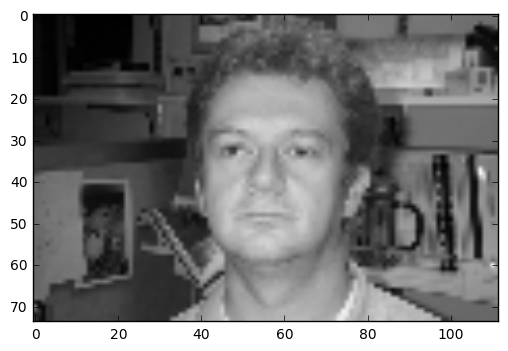

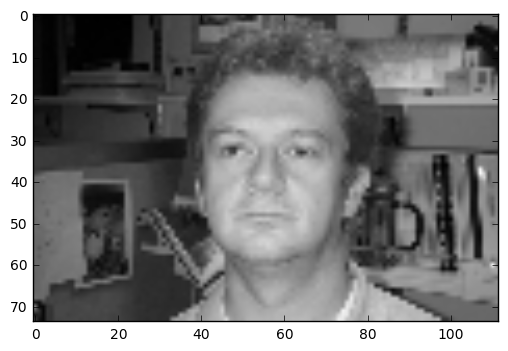

In [11]:


plt.close('all')

img_id = 0
figure = plt.figure()

plt.imshow(pred1[img_id].reshape((h,w)),cmap='gray')

figure = plt.figure()

plt.imshow(y[img_id].reshape((h,w)),cmap='gray')

plt.show()




The Topmost image is from the Training Dataset. The Regressor was able to converge. The Reconstruction Error is pretty low.

# Verifying the Model on Test Data

In [12]:
folder = 'test'

lst = os.listdir(folder)

imgs_hr = []
for i in lst:
    img = cv2.imread(folder+"/"+i,0)
    img = cv2.resize(img,(0,0), fx=0.25, fy=0.25)
    
    imgs_hr.append(img)
    
imgs_hr = np.array(imgs_hr)
imgs_hr = imgs_hr.astype(float)
imgs_lr = imgs_hr[:,::2,::2]


y = imgs_hr.reshape((len(imgs_hr),w*h))/255
X = imgs_lr.reshape((len(imgs_lr),int(h*w*.25)))/255

#X[0,1] = .99
#X[0,100] = .6

imgs_hr=None
imgs_lr = None
img_id=0

y[0]



array([ 0.34117647,  0.3372549 ,  0.34509804, ...,  0.16862745,
        0.58823529,  0.60784314])

In [13]:
#Check the Testing Errors

pred = model.predict(X[:,:])



reshaped = pred.reshape((len(pred),h,w))


test = np.sum(np.square(y - model.predict(X)))/len(y)

print ("Testing Error is ",test)



s = 0

pred1 = model.predict(X)

for i in range(len(pred1)):
    s = s + psnr(y[i]*255,pred1[i]*255)
    
s = s/len(y)

print ("Average Testing PSNR : ", s)



y = y.reshape((len(X),h,w))






('Testing Error is ', 160.64337269406496)
('Average Testing PSNR : ', 17.376491447244078)


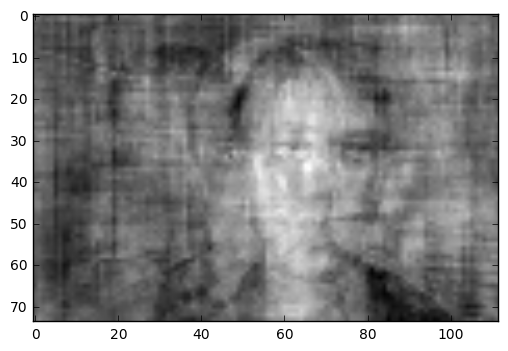

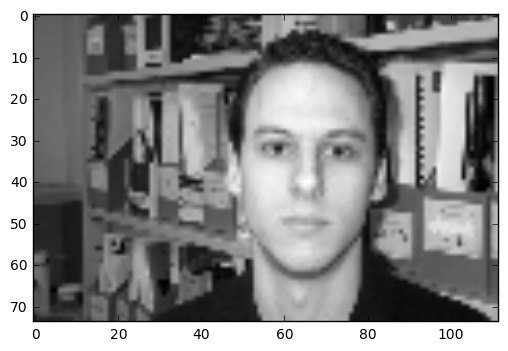

In [14]:
plt.close('all')

figure = plt.figure()

plt.imshow(reshaped[img_id],cmap='gray')

figure = plt.figure()

plt.imshow(y[img_id],cmap='gray')

plt.show()







We can see that the resulting image is not good. Linear Regression model fails to generalize the results for new images.


# Visualizing the Weights

In [15]:
weights = model.coef_
weights.shape

(8288, 2072)

In [195]:
pixel_coordinates = (60,60)


pixel_weights = weights.T[:,flat_coordinates(pixel_coordinates[0],pixel_coordinates[1],h,w)]

coeff_matrix = pixel_weights.dot(weights.T)

coeff_matrix

array([-0.00531638, -0.00701729, -0.00935734, ...,  0.00682476,
        0.00416131,  0.00365653])

In [196]:
mat = coeff_matrix.reshape((h,w))
#mat = abs(mat)
mat = np.exp(mat)
mat = mat/(np.max(mat))

#mean_val = np.mean(mat)

thresh = .99

#print (mean_val)

#mat = mat[:10,:10]

In [197]:
mat = np.where(mat>thresh,1,0)


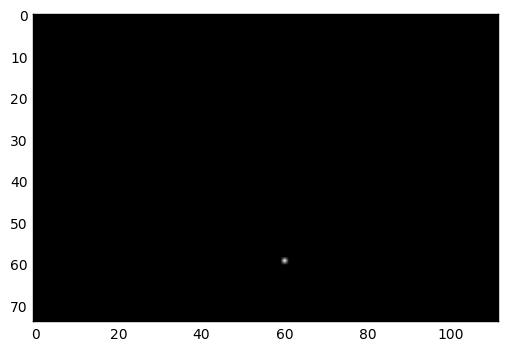

In [198]:
plt.imshow(mat,'gray')

plt.show()

In [156]:
flat_coordinates(pixel_coordinates[0],pixel_coordinates[1],h,w)


6688